In [3]:
import numpy as np
import csv
import math 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
#import sys


## inicio del programa 

#var1 = sys.argv[1]

#fila = int(var1)
## Banda de colores disponibles para la gráfica
#cmap = plt.cm.get_cmap('Paired')
cmap = plt.cm.get_cmap('viridis')
 
num_colors = 20
color = cmap(np.linspace(0, 1, num_colors))

## línea de visión 
def recta(x_0, y_0, x, angulo): # todos los puntos son conocidos, la función bota un punto adelante 
    y_recta= y_0+np.tan(np.radians(angulo))*(x-x_0)     

    return y_recta 

def angulos(x_0, y_0, x,y): # todos los puntos son conocidos, la función bota un punto adelante 
    angulos = np.degree(np.arctan((y-y_0)/(x-x_0)*escala))

    return angulos #en grados
 

def recta2(x_0, y_0, x, x2,y2): # todos los puntos son conocidos, la función bota un punto adelante 
    y_recta2= y_0+np.tan((y2-y_0)/(x2-x_0))*(x-x_0)     

    return y_recta2  

############################ 
# calcula el p0
# compara el array del cerro con la recta y da el valor de intersección
# pt_ob = (pt_obx, pt_oby) , array = valor en y del objeto cerro , array_recta = valores de y de la recta en la
# array_x = valores en x
# dirección de observación 

def pto_0(pt_ob, array_x, array): 
    for i in range(pt_ob[0], len(array_x)):
        if pto_0[1]==array[i]: 
            pto_inicial= i
    return (pto_inicial, pto_0[1])

def indice_p2(pt_ob, array_x, array_cerro, array_recta):  #indice final de cruce 
    indice_inicial = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_inicial = i            
                
    return (indice_inicial, array_cerro[indice_inicial])

def indice_p1(pt_ob, array_x, array_cerro, array_recta):  #indice inicial de cruce 
    indice_final = 0
    for i in range(pt_ob[0], len(array_x)):
        if (array_recta[i]-array_cerro[i])<0: 
            indice_final = i
            break
                
    return (indice_final, array_cerro[indice_final])
    
def distancia(p1, p2): #distancia entre dos puntos 
 
    dist = math.sqrt((p2[1]-p1[1])**2 + ((p2[0]-p1[0])*escala_satelite)**2)  
    return dist  

##############################
## Punto de inicio ## creo que no es usado 
#ptx:   pto de observación
#arr_x: array de valores en X
#arr_y: array de valores del perfil del cerro en Y 

def inicio(punto_inicio, arr_x, arr_y): 
    punto_inicio[0]
    
    for j in range(punto_inicio[0],len(arr_x),1):
        if punto_inicio[1] > arr_y[j]:
            inicio = arr_y[j]
    
    return inicio

###############################
## CÁLCULO DEL LA ELEVACIÓN MÁXIMA DE OBSERVACION


def angulo_maximo(arr_x, np_array, p): #arra_x: indices en el eje X, fila: fila de analisis, p: punto de observación 
        vec_picos = []
        vec  = []
        ind_y = 0 
        ind_x = 0 
    
        for j in range(p[0], len(arr_x)): 
            if np_array[j] > ind_y:
                ind_y = np_array[j]
                ind_x = j 
                
                
        vec_picos.append(ind_x) 
        vec_picos.append(ind_y) 
        
        phi_max = np.degrees(np.tan((ind_y-p[1])/(arr_x[ind_x]-p[0])))
        
        
        return (vec_picos, phi_max) #ángulo en grados
    
#ecuaciones de pérdida de energía 


def funciondEdX(E): 
    me = 0.0005285 #GeV/c2
    mu = 0.1057 #GeV/c2
    
    
    Emax = (E**2)/(E+(mu**2)/(2*me))
    dEdx = 1.84 + 0.076* np.log(Emax/(mu))

    return dEdx
        
        
def perdida_energia_total(E, d): #energia y distancia por recorrer
    
    
    temp = E
    ar_x = np.linspace(0, d, 100)
    
    for i in range(len(ar_x)): 
        
        temp = temp - funciondEdX(temp)  
        
        if temp < 0 : 
            control = False
            temp = 0
            break 
        control = True
        
    energia_final = temp 
    
    return (energia_final, control)
    #Control True = pasó, False = no pasó

## Diccionario de distancias 

def acceder_diccionario(diccionario, valor_clave):
    valor_distancia = 0 
    for clave, valor in diccionario.items(): 
        if clave == valor_clave: 
            valor_distancia = diccionario[valor_clave]
    return valor_distancia 

file_raster = './rastert_dem_uni1-clean.txt' ## DEM file 
file_shower_txt = './data/energia_2_temp.txt' ## DEM file 

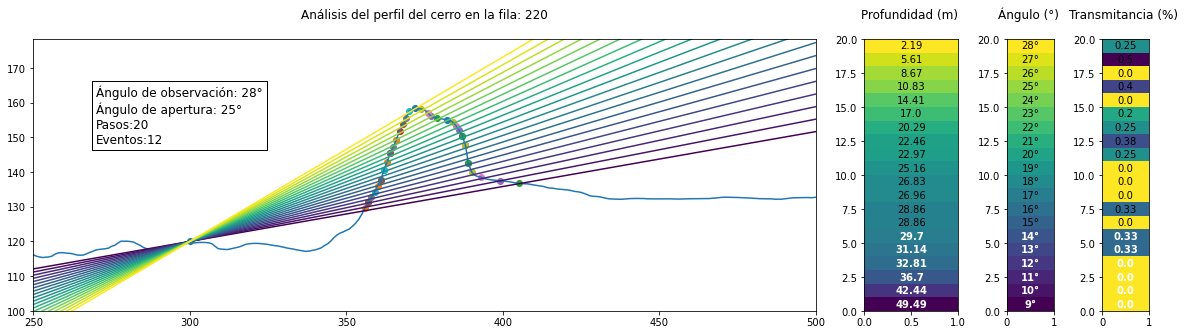

In [306]:
fila = 220
n,m = 300 ,120 #punto de observación (X,Y)
apertura = 25 #apertura del ángulo 
escala_satelite = 1 # escala en X de acuerdo a datos de CONIDA 
fac = 1000 # Conversión MeV to GeV para la energía del shower 
angle_observation = 270 # ángulo phi de observación en coordenadas de CORSIKA
phi1 , phi2 = 269, 271 #posición de observación en coordenadas de CORSIKA
df_shower_txt  = pd.read_csv(file_shower_txt, sep =" ")# Lee los datos del raster del objeto


df  = pd.read_csv(file_raster, sep =" ", header=None)# Lee los datos del raster del objeto
df  = df.fillna(0)
df  = df.drop(columns=626)#eliminar la última columna 
columnas = df.shape[1] 
filastotal=df.shape[0]
arr_y_cerro = []
arr_x = np.linspace(0,columnas-1,columnas) #crea los valores en x para iterar
pt_ob = [n,m] #punto de observación
arr_y_cerro = df.iloc[fila].to_numpy() #elevación del cerro en la fila=fila

ang_max = int(np.round(angulo_maximo(arr_x, arr_y_cerro, pt_ob)[1])) #ángulo máximo de observación para una fila 
theta1, theta2= ang_max-apertura, ang_max-2.0 #angulos de observación para una fila dada Y límites de observación

anglet =10.0

################################# IMPORTANTE #################################
df_shower_txt3 = df_shower_txt
#df_shower_txt3 = df_shower_txt[(df_shower_txt['part'] ==5) | (df_shower_txt['part'] ==6)] #<---------------------
data_shower = df_shower_txt3.sort_values(by=df_shower_txt3.columns[1]) 
################################# IMPORTANTE #################################

#dfshower_filtrado = dfshower_pre_filtrado[]
#dfshower_filtrado = data_shower[(data_shower['phit'] >= angle_observation-anglet) & (data_shower['phit'] <= angle_observation+anglet) &(data_shower['thetat'] >= theta1) & (data_shower['thetat'] <= theta2)]
#dfshower_conteo=data_shower2.groupby(['phit','thetat'])['Et'].count().reset_index(name='count')
#dfshower_conteo=dfshower_pre_filtrado.groupby(['phit','thetat'])['Et'].count().reset_index(name='count')

#estás agrupando el DataFrame df por las columnas 'phit' y 'thetat', y luego seleccionando 
#la columna 'Et' de esas agrupaciones.  
##### inicio de calculo

fig, axs = plt.subplots(1, 4,figsize=(20,5), gridspec_kw={'width_ratios': [5, 0.6,0.3,0.3]})  # 2 filas, 1 columna de subplots
 
############
#PLOT 0 del perfil UNI 
############ 
axs[0].plot(arr_y_cerro)
axs[0].scatter(pt_ob[0], pt_ob[1])

vec_dis=[] #vector con la fila, el ángulo de observación y la profundida
j=0
axs[0].set_title("Análisis del perfil del cerro en la fila: "+str(fila)+'\n') 
for i in range(ang_max-apertura, ang_max,1):
    y = recta(pt_ob[0], pt_ob[1], arr_x, i)     
    p2 = indice_p2(pt_ob, arr_x, arr_y_cerro, y)
    p1 = indice_p1(pt_ob, arr_x, arr_y_cerro, y) 
    if (p2[0]!=0) or (p1[0]!=0):         
        axs[0].plot(arr_x, y, color=color[j])
        axs[0].scatter(p1[0], p1[1])
        axs[0].scatter(p2[0], p2[1])
        d = (distancia(p1,p2))
        j=j+1 #indice para los colores
        evento = [fila, i,d]  #los valores registrados son azimutales, los valores en el plot son elevación
        elevacion_max = i 
        vec_dis.append(evento)  # fila, i angulo de observación , distancia 
        
texto = 'Ángulo de observación: '+str(round(elevacion_max))+'°'+'\nÁngulo de apertura: '+str(apertura)+'°'+'\nPasos:'+ str(j) +'\nEventos:'+ str(len(dfshower_pre_filtrado))
x_pos = n-30 # valor 20 de posición de texto en X
y_pos = np.max(arr_y_cerro) -10 # valor de posición de caja de texto en Y
axs[0].text(x_pos, y_pos, texto,fontsize = '12', bbox=dict(facecolor='white', edgecolor='black', linewidth=1))
axs[0].set_xlim(n-50,500) 
axs[0].set_ylim(100, np.max(arr_y_cerro)+20)   


############
#PLOT 1 de la distancia
############
#vec_dis matrix con los valores de observación y distancia para cada evento
a_vec_dis=[] #vector con los valores de profundidad desde un punto de observación dado por vec_dis. 
for i in range(len(vec_dis)):
    r = vec_dis[i][2]
    a_vec_dis.append(np.round(r,2))
    

a_vec_dis = np.array(a_vec_dis) #registra las distancias de los ángulos disponibles para la observación desde un punto de observación 
a_vec_dis=a_vec_dis[::-1] 
matriz = np.tile(a_vec_dis, (1,1))
matriz_rotada_distancias_observacion = np.rot90(matriz) 

axs[1].set_title("Profundidad (m) \n")
im = axs[1].pcolormesh(matriz_rotada_distancias_observacion,cmap="viridis_r")

for i in range(matriz_rotada_distancias_observacion.shape[0]):
    for j in range(matriz_rotada_distancias_observacion.shape[1]): 
        if i <= 5:         
            axs[1].text(j+0.5, i+0.5, str(matriz_rotada_distancias_observacion[i,j]), fontweight='bold',  color='white', ha='center', va='center')
        else: 
            axs[1].text(j+0.5, i+0.5, str(matriz_rotada_distancias_observacion[i,j]), color='black', ha='center', va='center')

            

################
#PLOT 2: Ángulo 
############

b_vec_dis=[] #vector con los valores de profundidad tomada de vec_dis
for i in range(len(vec_dis)):
    rr = vec_dis[i][1]
    b_vec_dis.append(np.round(rr,2))

b_vec_dis = np.array(b_vec_dis)
b_vec_dis=b_vec_dis[::-1] 
matriz_2 = np.tile(b_vec_dis, (1,1))
matriz_rotada_angulos_observacion = np.rot90(matriz_2)  

axs[2].set_title("Ángulo (°) \n")
 
io = axs[2].pcolormesh(matriz_rotada_angulos_observacion,cmap="viridis")

for i in range(matriz_rotada_angulos_observacion.shape[0]):
    for j in range(matriz_rotada_angulos_observacion.shape[1]):
        if i <= 5:         
            axs[2].text(j+0.5, i+0.5, str(matriz_rotada_angulos_observacion[i,j])+'°', fontweight='bold',color='white', ha='center', va='center')
        else: 
            axs[2].text(j+0.5, i+0.5, str(matriz_rotada_angulos_observacion[i,j])+'°',  color='black', ha='center', va='center')

################################################
## Cálculo de la atenuación
################################################

diccionario = {}  # Inicializar el diccionario vacío

for i in range(0, len(vec_dis)):  # Bucle for para generar claves del 1 al 5
    clave = vec_dis[i][1] #valores de distancia
    valor = vec_dis[i][2] #valores de ángulos 
    diccionario[clave] = valor  # Agregar clave-valor al diccionario  

veco=[] #array con los valores de phi , theta, distancia recorrida, Einicial, Efinal, Control

dfshower_pre_filtrado = data_shower[ (data_shower['phit'] >= angle_observation-anglet) & (data_shower['phit'] <= angle_observation+anglet) &(data_shower['thetat'] >= theta1) & (data_shower['thetat'] <= elevacion_max)]
dfshower_filtrado = dfshower_pre_filtrado.drop('part', axis=1) 

#del data_shower


#para todos los eventos se calcula la atenuación 
for j in range(len(dfshower_filtrado)):     
    temp_angulo_shower = dfshower_filtrado.iloc[j][1] # ángulo theta del evento j en el shower
    temp_energia_shower = dfshower_filtrado.iloc[j][2] * fac # energía inicial del evento 
    temp_distancia_x_angulo = acceder_diccionario(diccionario, temp_angulo_shower) ###############################################
    #print(temp_distancia_x_angulo, temp_energia_shower, temp_angulos_shower) funciona
    #print(funciondEdX(temp_energia_shower)) funciona
    val_temp = perdida_energia_total(temp_energia_shower, temp_distancia_x_angulo)[1] #Condicional si la pérdida de energía del evento corresponde a haber pasado o quedarse en el objeto 
    #res_atenua = phi , theta elevacion del evento, la distancia recorrida, la Einicial del evento, Efinal del evento, Condicional True = pasó, False = no pasó
    #res_atenua = [dfshower_filtrado.iloc[j][0], temp_angulo_shower, temp_distancia_x_angulo, temp_energia_shower, perdida_energia_total(temp_energia_shower, temp_distancia_x_angulo)[0], val_temp] 
    res_atenua = [temp_angulo_shower, temp_distancia_x_angulo, temp_energia_shower, perdida_energia_total(temp_energia_shower, temp_distancia_x_angulo)[0], val_temp] 
    
    veco.append(res_atenua)

#datos1 sirve para registrar al menos 1 valor Falso, de atenuación completa en caso la energía es muy alta# 
datos1 = []
for i in range(len(vec_dis)):
    datos1.append([vec_dis[i][1], acceder_diccionario(diccionario, vec_dis[i][1]), 0, 0, False])
veco.extend(datos1)
    
#df_atenuado = pd.DataFrame(veco, columns=['phi','theta','distancia', 'Energia_i', 'Energia_f', 'Control'])
df_atenuado = pd.DataFrame(veco, columns=['theta','distancia', 'Energia_i', 'Energia_f', 'Control'])
# filtramos por valores de control si pasó o no el evento
# df_atenuado_filtro tiene el valor de theta para aquellos que pasaron y los que no
df_atenuado_con_filtro=df_atenuado.groupby(['theta','Control'])['theta'].count().reset_index(name='count') 

#del dfshower_pre_filtrado
#del dfshower_filtrado



################################################
## Fin del cálculo de la atenuación
################################################
## Calculamos el porcentaje de atenuación

conteo = df_atenuado.pivot_table(index='theta', columns='Control', aggfunc='size', fill_value=0).reset_index()
conteo['transmitancia'] = np.round( conteo.iloc[:, 2] / (conteo.iloc[:, 1]+conteo.iloc[:, 2] ), 2)


vec_angle = conteo['theta'].to_numpy()
vec_atenuado = conteo['transmitancia'].to_numpy()

#del df_atenuado
#del df_atenuado_con_filtro


#vec_angle = [] #vector con los ángulos 
#vec_atenuado = [] #vector con los valores atenuados por ángulo 
#vec_counts = [] #vector con el conteo por ángulo
#for j in range(0,len(df_atenuado_con_filtro)-1,2):     
#    angle_temp = df_atenuado_con_filtro.iloc[j][0] ###############################################
#    a = df_atenuado_con_filtro.iloc[j][2] 
#    b = df_atenuado_con_filtro.iloc[j+1][2] 
#    por = np.round(b/(a+b)*100,2) 
#    vec_angle.append(angle_temp)
#    vec_atenuado.append(por)
#    vec_counts.append([angle_temp,por])

#data_porcentaje = np.array(vec_atenuado[:,1])
data_porcentaje = np.array(vec_angle)
  


############
#PLOT 3
############
data_angle = np.array(vec_atenuado)
data_angle=data_angle[::-1] 

 
matriz_3 = np.tile(data_angle, (1,1))
matriz_rotada_3 = matriz_3
matriz_rotada_3 = np.rot90(matriz_3) 

axs[3].set_title("Transmitancia (%) \n")
 
iu = axs[3].pcolormesh(matriz_rotada_3,cmap="viridis_r")

for i in range(matriz_rotada_3.shape[0]):
    for j in range(matriz_rotada_3.shape[1]): 
        if i <= 5:         
            axs[3].text(j+0.5, i+0.5, str(matriz_rotada_3[i,j]), fontweight='bold', color='white', ha='center', va='center')
            
        else: 
            axs[3].text(j+0.5, i+0.5, str(matriz_rotada_3[i,j]), color='black', ha='center', va='center')
             
######################################


#plt.tight_layout()
#cbar1 = fig.colorbar(im, ax=axs[1])
#cbar2 = fig.colorbar(io, ax=axs[2]) 

#cbar1.ax.invert_yaxis()
#cbar2.ax.invert_yaxis()
# Mostrar los subplots
plt.savefig('analisis_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'_pasos_'+str(1+np.round(ang_max-apertura))+'.jpg')

plt.show()



#nombre_file = 'atenuacion_CerroUNI_tpE_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'.txt'
#df_atenuado.to_csv(nombre_file, index=False, header=True, sep=' ')

#df_atenuado_final = pd.DataFrame(vec_counts, columns=['Elevacion','Atenuacion'])
#nombre_file_2 = 'transmitancia_atenuacion_CerroUNI_tpE_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'.txt'
#df_atenuado_final.to_csv(nombre_file_2, index=False, header=True, sep=' ')
#nombre_file_3 = 'conteo_atenuacion_CerroUNI_tpE_fila_'+str(fila)+'_angmax_'+str(ang_max)+'_apertura_'+str(apertura)+'.txt'
#df_atenuado_con_filtro .to_csv(nombre_file_3, index=False, header=True, sep=' ')
        